# 1. Data Introduction

In [1]:
# import basic library
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from datetime import date
from scipy import stats
import lux

In [2]:
# Load dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# Melihat info dari dataset seperti jumlah kolom, input, type data, dan memori
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Melihat apakah ada missing value dalam dataset
data.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# 2. Data Preprocessing

## 2.1 Handling Variabel

Pada bagian ini kita akan melakukan penanganan pada tiap variabel atau kolom pada dataset, seperti handling missing value, melihat distribusi pada tiap kolom, dan EDA pada tiap kolom

In [6]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
dtype: int64


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\lib\pretty.py:700: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0.5, 1.0, 'Age Distribution')

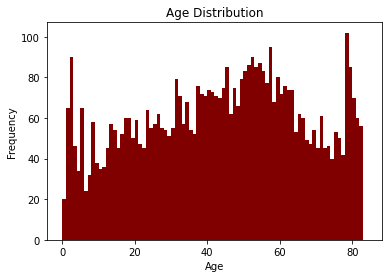

In [7]:
# Karena type data age adalah float tapi tidak memungkinkan umur berbentuk desimal,
# maka kita akan mengubah menjadi integer dengan pembulatan
data.age = data.age.round().astype('int')
print(data.age.describe())
# melihat distribusi kolom age
bin_list = list(range(0,85,1))
plt.hist(x=data.age,bins=bin_list,color='maroon')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

No     4612
Yes     498
dtype: int64



<ipython-input-8-441414c3c956>:3: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0, 0.5, 'Frequency')

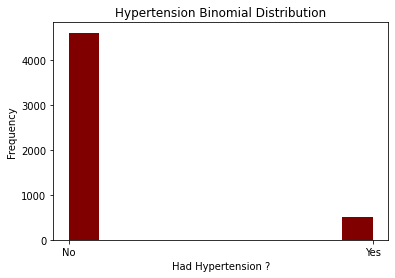

In [8]:
# kolom Hypertension merupakan kolom kategori yang berisi True or False value, True = 1, False = 0
hypertension = data.hypertension.replace({0:'No',1:'Yes'})
print(hypertension.value_counts())
plt.hist(x= hypertension,color='maroon')
plt.title('Hypertension Binomial Distribution')
plt.xlabel('Had Hypertension ?')
plt.ylabel('Frequency')

No     4834
Yes     276
dtype: int64



<ipython-input-9-277c0d080978>:3: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0, 0.5, 'Frequency')

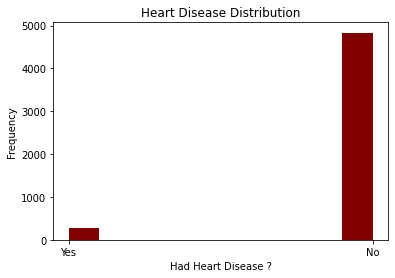

In [9]:
# kolom heart_disease juga kolom kategori, kita akan mengganti 0 = No dan 1 = Yes
heart_disease = data.heart_disease.replace({0:'No',1:'Yes'})
print(heart_disease.value_counts())
plt.hist(x=heart_disease,color='maroon')
plt.title('Heart Disease Distribution')
plt.xlabel('Had Heart Disease ?')
plt.ylabel('Frequency')

In [10]:
# dari grafik di atas dapat dilihat bahwa kolom hypertension dan heart_disease
# memiliki hubungan, kita akan membandingkan kedua kolom tersebut
compare = pd.DataFrame()
compare = data.loc[(data['hypertension'] != data['heart_disease'])]
compare

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Yes    3353
No     1757
dtype: int64



<ipython-input-11-8de0ad70bf47>:3: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0, 0.5, 'Frequency')

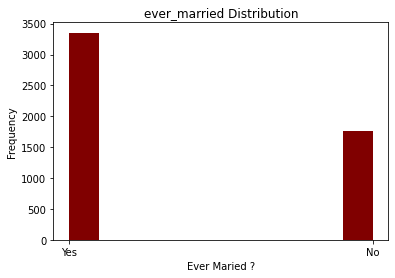

In [11]:
# kolom ever_married juga merupakan kolom kategori,
# kita ingin melihat distribusi pada kolom ini
print(data.ever_married.value_counts())
plt.hist(data.ever_married,color='maroon')
plt.title('ever_married Distribution')
plt.xlabel('Ever Maried ?')
plt.ylabel('Frequency')

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
dtype: int64



<ipython-input-12-4939ffab06c4>:3: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0.5, 0, 'Type of Work')

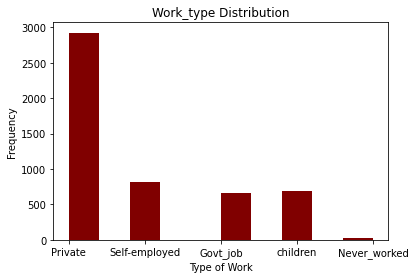

In [12]:
# kolom work_type juga merupakan kolom kategori
# kita akan melihat ada berapa kategori dalam kolom tersebut
print(data.work_type.value_counts())
# ada 5 kategori dalam kolom work_type, nanti akan kita ubah menjadi label untuk analisa
plt.hist(x= data.work_type,color='maroon')
plt.title('Work_type Distribution')
plt.ylabel('Frequency')
plt.xlabel('Type of Work')

Urban    2596
Rural    2514
dtype: int64



<ipython-input-13-6aac3139cf19>:3: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0, 0.5, 'Frequency')

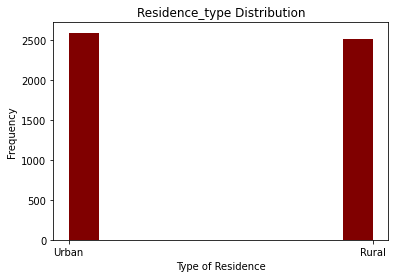

In [13]:
# kolom Residence_type juga merupakan kolom kategori
# kita ingin melihat distribusi dari value 
print(data.Residence_type.value_counts())
plt.hist(x=data.Residence_type,color='maroon')
plt.title('Residence_type Distribution')
plt.xlabel('Type of Residence')
plt.ylabel('Frequency')

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0.5, 0, 'Avg Glucose Level')

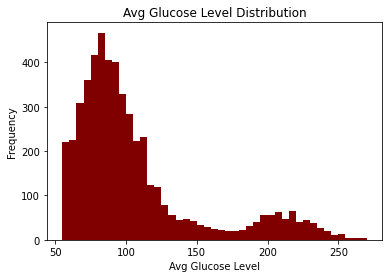

In [14]:
# kolom avg_glucose_level bertipe float sudah sesuai
# melihat EDA dari kolom
print(data.avg_glucose_level.describe())

# melihat distribusi dari kolom
bins_list = list(range(55,275,5))
plt.hist(x=data.avg_glucose_level, bins=bins_list,color='maroon')
plt.title('Avg Glucose Level Distribution')
plt.ylabel('Frequency')
plt.xlabel('Avg Glucose Level')

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0, 0.5, 'Frequency')

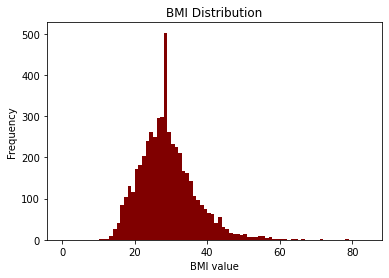

In [15]:
# kolom bmi bertipe float juga, terdapat missing value pada kolom
# melihat EDA dari kolom bmi
print(data.bmi.describe())
# mengisi missing value dengan mean dari kolom bmi
data.bmi = data.bmi.fillna(data.bmi.mean())
# melihat distribusi dari kolom bmi
plt.hist(data.bmi, bins=bin_list,color='maroon')
bin_list=list(range(10,100,1))
plt.title('BMI Distribution')
plt.xlabel('BMI value')
plt.ylabel('Frequency')

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
dtype: int64



<ipython-input-16-78666ed562b7>:3: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0.5, 0, 'Smoking Status')

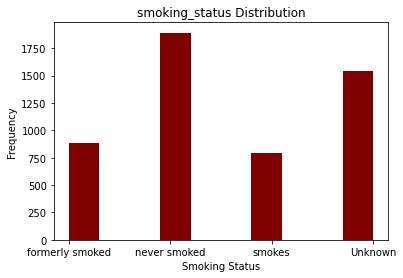

In [16]:
# kolom smoking_status adalah kategori
# melihat unique value dari kolom smoking_status
print(data.smoking_status.value_counts())
plt.hist(data.smoking_status,histtype='barstacked',color='maroon')
plt.title('smoking_status Distribution')
plt.ylabel('Frequency')
plt.xlabel('Smoking Status')


No     4861
Yes     249
dtype: int64



<ipython-input-17-0518dc2179d2>:4: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0, 0.5, 'Stroke')

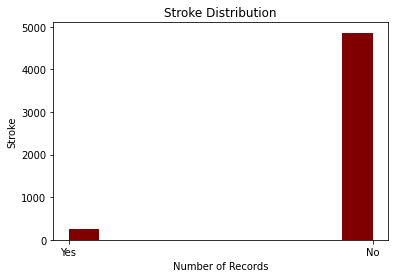

In [17]:
# kolom stroke merupakan kolom target yang akan kita prediksi
# melihat distribusi value kolom stroke
stroke = data.stroke.replace({0:'No',1:'Yes'})
print(stroke.value_counts())
# data imblance karena nilai 0 atau tidak stroke jauh lebih besar dari nilai 1 atau stroke
plt.hist(x=stroke,color='maroon')
plt.title('Stroke Distribution')
plt.xlabel('Number of Records')
plt.ylabel('Stroke')

In [18]:
# melihat apakah masih ada missing values
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\lib\pretty.py:700: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


## 2.2 Data Exploration

Pada bagian ini kita akan melakukan ekslorasi pada dataset, kolom - kolom, dan visualisasi insight yang ada pada dataset ini.

In [19]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### 2.2.1 Hypertension

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


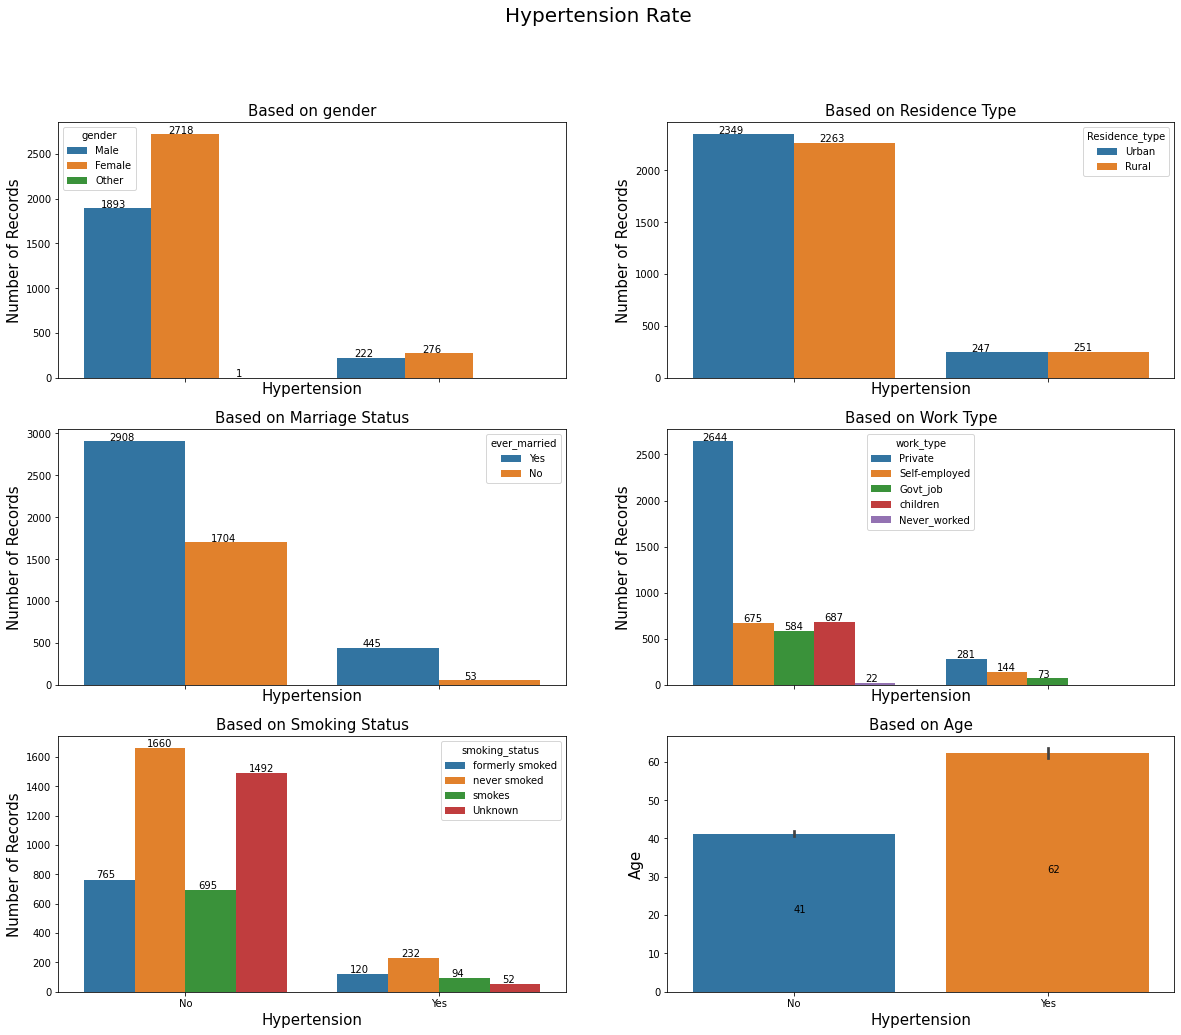

In [20]:
data_vis = data.copy()
data_vis.hypertension = data_vis.hypertension.replace({0:'No',1:'Yes'})
fig, axes = plt.subplots(3, 2, figsize=(20,16), sharey=False,sharex=True)
fig.suptitle('Hypertension Rate',fontsize=20)

# Hypertension grBased on Gender
sns.countplot(ax=axes[0,0], data=data_vis, x='hypertension', hue='gender',)
axes[0,0].set_title('Based on gender',fontsize=15)
axes[0,0].set_xlabel('Hypertension',fontsize=15)
axes[0,0].set_ylabel('Number of Records',fontsize=15)
for i in axes[0,0].patches:
   axes[0,0].text(i.get_x() + i.get_width()/4, i.get_height() + 10, "%.0f" % i.get_height())

# Hypertension grBased on Residence Type
sns.countplot(ax=axes[0,1], data=data_vis,x='hypertension',hue='Residence_type')
axes[0,1].set_title('Based on Residence Type',fontsize=15)
axes[0,1].set_xlabel('Hypertension',fontsize=15)
axes[0,1].set_ylabel('Number of Records',fontsize=15)
for  x in axes[0,1].patches:
   axes[0,1].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# Hypertension grBased on Marriage Status
sns.countplot(ax=axes[1,0], data=data_vis,x='hypertension',hue='ever_married')
axes[1,0].set_title('Based on Marriage Status',fontsize=15)
axes[1,0].set_xlabel('Hypertension',fontsize=15)
axes[1,0].set_ylabel('Number of Records',fontsize=15)
for  x in axes[1,0].patches:
   axes[1,0].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# Hypertension grBased on Work Type
sns.countplot(ax=axes[1,1], data=data_vis,x='hypertension',hue='work_type')
axes[1,1].set_title('Based on Work Type',fontsize=15)
axes[1,1].set_xlabel('Hypertension',fontsize=15)
axes[1,1].set_ylabel('Number of Records',fontsize=15)
for  x in axes[1,1].patches:
   axes[1,1].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# Hypertension grBased on Smoking Status
sns.countplot(ax=axes[2,0], data=data_vis,x='hypertension',hue='smoking_status')
axes[2,0].set_title('Based on Smoking Status',fontsize=15)
axes[2,0].set_xlabel('Hypertension',fontsize=15)
axes[2,0].set_ylabel('Number of Records',fontsize=15)
for  x in axes[2,0].patches:
   axes[2,0].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# Hypertensio grBased on age
sns.barplot(data=data_vis,y='age',x='hypertension',ax=axes[2,1])
axes[2,1].set_title('Based on Age',fontsize=15)
axes[2,1].set_xlabel('Hypertension',fontsize=15)
axes[2,1].set_ylabel('Age',fontsize=15)
for  x in axes[2,1].patches:
   axes[2,1].text( x.get_x() +  x.get_width()/2,  x.get_height()/2, "%.0f" % x.get_height())



### 2.2.2 Heart Disease

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


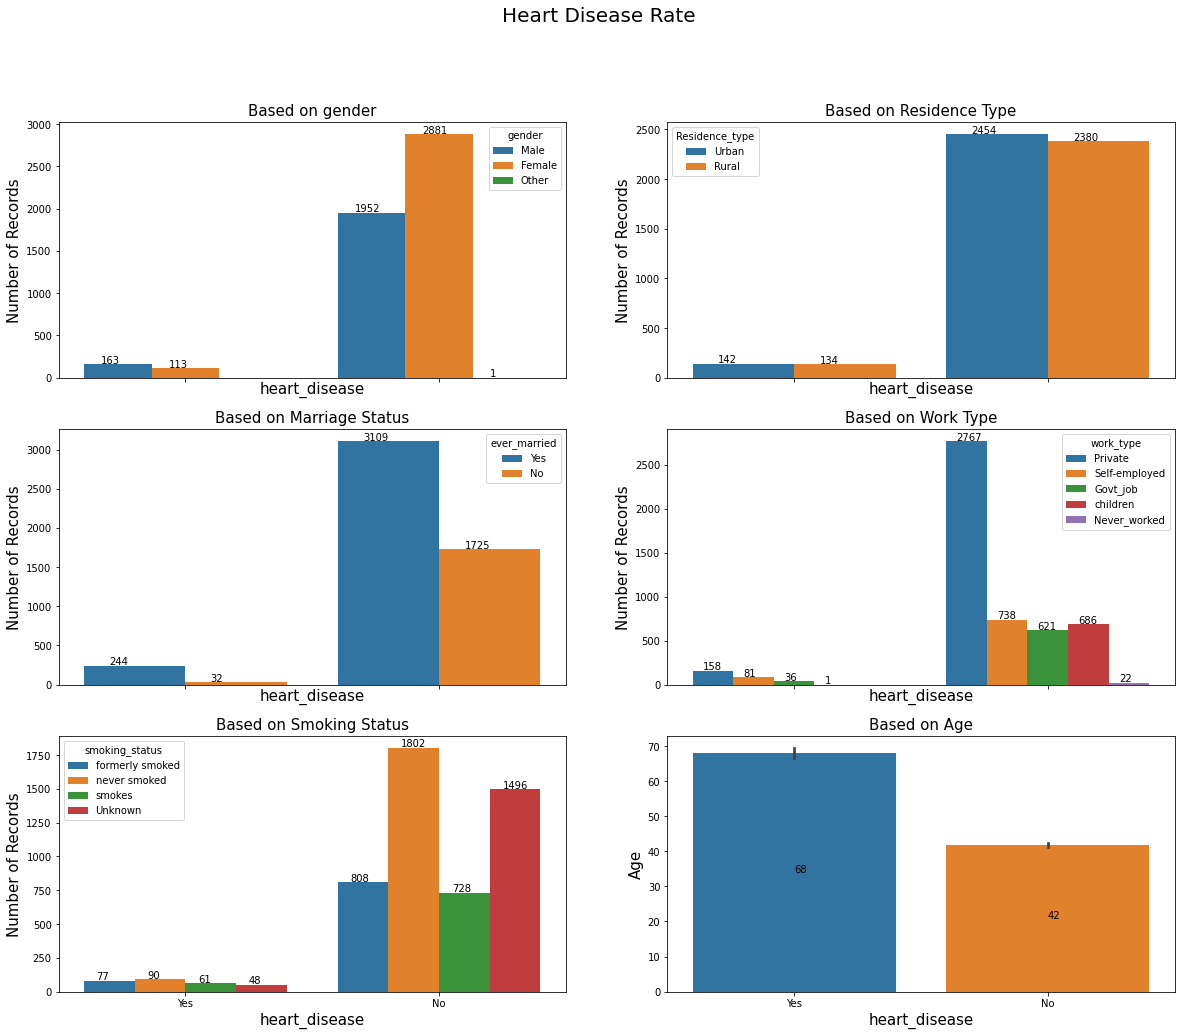

In [21]:
data_vis.heart_disease = data_vis.heart_disease.replace({0:'No',1:'Yes'})
fig, axes = plt.subplots(3, 2, figsize=(20,16), sharey=False,sharex=True)
fig.suptitle('Heart Disease Rate',fontsize=20)

# heart_disease Based on Gender
sns.countplot(ax=axes[0,0], data=data_vis, x='heart_disease', hue='gender',)
axes[0,0].set_title('Based on gender',fontsize=15)
axes[0,0].set_xlabel('heart_disease',fontsize=15)
axes[0,0].set_ylabel('Number of Records',fontsize=15)
for i in axes[0,0].patches:
   axes[0,0].text(i.get_x() + i.get_width()/4, i.get_height() + 10, "%.0f" % i.get_height())

# heart_disease Based on Residence Type
sns.countplot(ax=axes[0,1], data=data_vis,x='heart_disease',hue='Residence_type')
axes[0,1].set_title('Based on Residence Type',fontsize=15)
axes[0,1].set_xlabel('heart_disease',fontsize=15)
axes[0,1].set_ylabel('Number of Records',fontsize=15)
for  x in axes[0,1].patches:
   axes[0,1].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# heart_disease Based on Marriage Status
sns.countplot(ax=axes[1,0], data=data_vis,x='heart_disease',hue='ever_married')
axes[1,0].set_title('Based on Marriage Status',fontsize=15)
axes[1,0].set_xlabel('heart_disease',fontsize=15)
axes[1,0].set_ylabel('Number of Records',fontsize=15)
for  x in axes[1,0].patches:
   axes[1,0].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# heart_disease Based on Work Type
sns.countplot(ax=axes[1,1], data=data_vis,x='heart_disease',hue='work_type')
axes[1,1].set_title('Based on Work Type',fontsize=15)
axes[1,1].set_xlabel('heart_disease',fontsize=15)
axes[1,1].set_ylabel('Number of Records',fontsize=15)
for  x in axes[1,1].patches:
   axes[1,1].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# heart_disease Based on Smoking Status
sns.countplot(ax=axes[2,0], data=data_vis,x='heart_disease',hue='smoking_status')
axes[2,0].set_title('Based on Smoking Status',fontsize=15)
axes[2,0].set_xlabel('heart_disease',fontsize=15)
axes[2,0].set_ylabel('Number of Records',fontsize=15)
for  x in axes[2,0].patches:
   axes[2,0].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

#heart_disease Based on age
sns.barplot(data=data_vis,y='age',x='heart_disease',ax=axes[2,1])
axes[2,1].set_title('Based on Age',fontsize=15)
axes[2,1].set_xlabel('heart_disease',fontsize=15)
axes[2,1].set_ylabel('Age',fontsize=15)
for  x in axes[2,1].patches:
   axes[2,1].text( x.get_x() +  x.get_width()/2,  x.get_height()/2, "%.0f" % x.get_height())



Berdasarkan grafik di Heart Disease Rate

### 2.2.3 Stroke

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


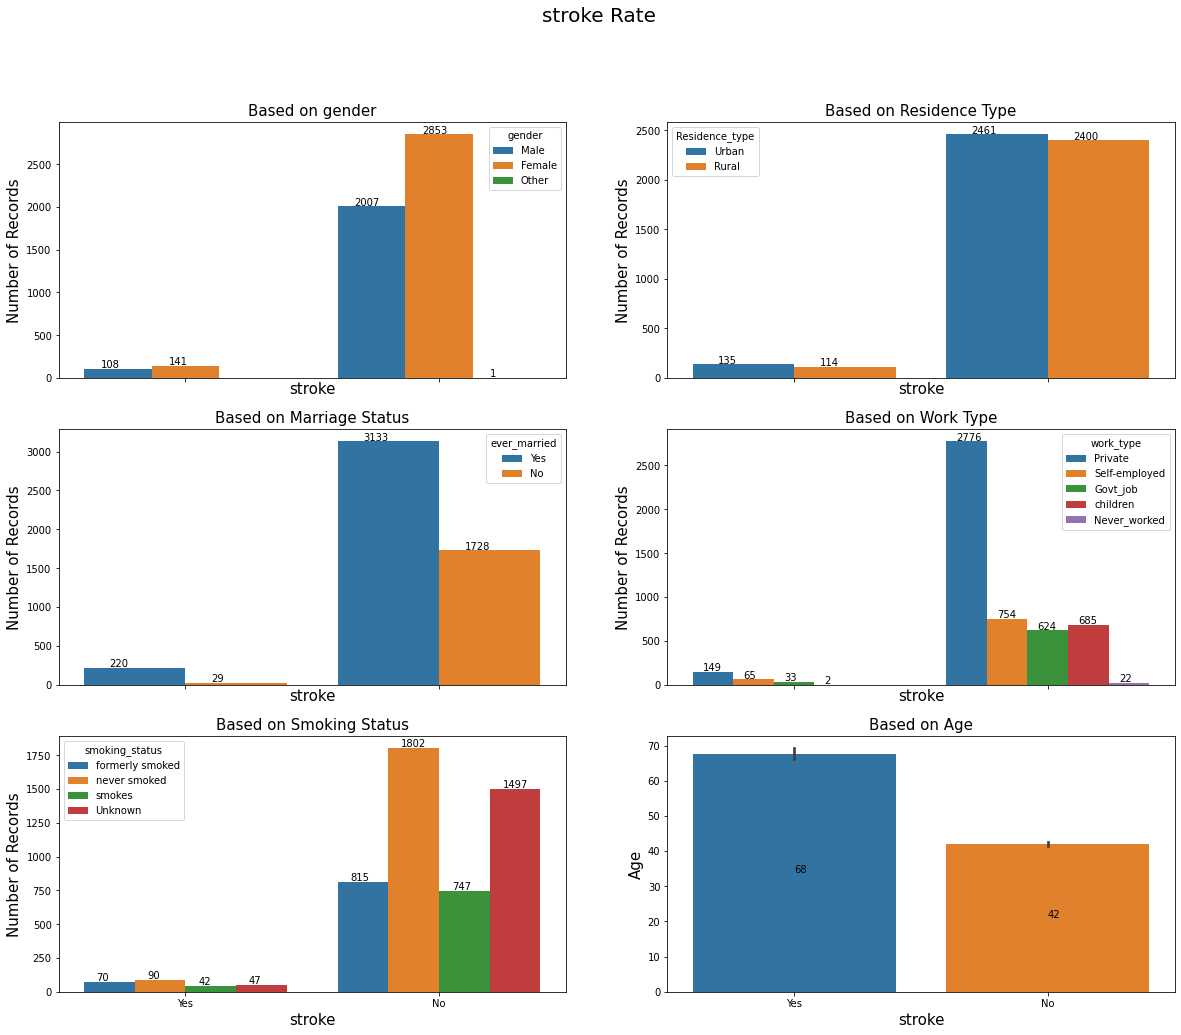

In [22]:
data_vis.stroke = data_vis.stroke.replace({0:'No',1:'Yes'})
fig, axes = plt.subplots(3, 2, figsize=(20,16), sharey=False,sharex=True)
fig.suptitle('stroke Rate',fontsize=20)

# stroke Based on Gender
sns.countplot(ax=axes[0,0], data=data_vis, x='stroke', hue='gender',)
axes[0,0].set_title('Based on gender',fontsize=15)
axes[0,0].set_xlabel('stroke',fontsize=15)
axes[0,0].set_ylabel('Number of Records',fontsize=15)
for i in axes[0,0].patches:
   axes[0,0].text(i.get_x() + i.get_width()/4, i.get_height() + 10, "%.0f" % i.get_height())

# stroke Based on Residence Type
sns.countplot(ax=axes[0,1], data=data_vis,x='stroke',hue='Residence_type')
axes[0,1].set_title('Based on Residence Type',fontsize=15)
axes[0,1].set_xlabel('stroke',fontsize=15)
axes[0,1].set_ylabel('Number of Records',fontsize=15)
for  x in axes[0,1].patches:
   axes[0,1].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# stroke Based on Marriage Status
sns.countplot(ax=axes[1,0], data=data_vis,x='stroke',hue='ever_married')
axes[1,0].set_title('Based on Marriage Status',fontsize=15)
axes[1,0].set_xlabel('stroke',fontsize=15)
axes[1,0].set_ylabel('Number of Records',fontsize=15)
for  x in axes[1,0].patches:
   axes[1,0].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# stroke Based on Work Type
sns.countplot(ax=axes[1,1], data=data_vis,x='stroke',hue='work_type')
axes[1,1].set_title('Based on Work Type',fontsize=15)
axes[1,1].set_xlabel('stroke',fontsize=15)
axes[1,1].set_ylabel('Number of Records',fontsize=15)
for  x in axes[1,1].patches:
   axes[1,1].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# stroke Based on Smoking Status
sns.countplot(ax=axes[2,0], data=data_vis,x='stroke',hue='smoking_status')
axes[2,0].set_title('Based on Smoking Status',fontsize=15)
axes[2,0].set_xlabel('stroke',fontsize=15)
axes[2,0].set_ylabel('Number of Records',fontsize=15)
for  x in axes[2,0].patches:
   axes[2,0].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

#stroke Based on age
sns.barplot(data=data_vis,y='age',x='stroke',ax=axes[2,1])
axes[2,1].set_title('Based on Age',fontsize=15)
axes[2,1].set_xlabel('stroke',fontsize=15)
axes[2,1].set_ylabel('Age',fontsize=15)
for  x in axes[2,1].patches:
   axes[2,1].text( x.get_x() +  x.get_width()/2,  x.get_height()/2, "%.0f" % x.get_height())



Berdasarkan grafik di atas

### 2.2.4 Average Glucose Level

In [23]:
data_vis

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0, 0.5, 'Age')

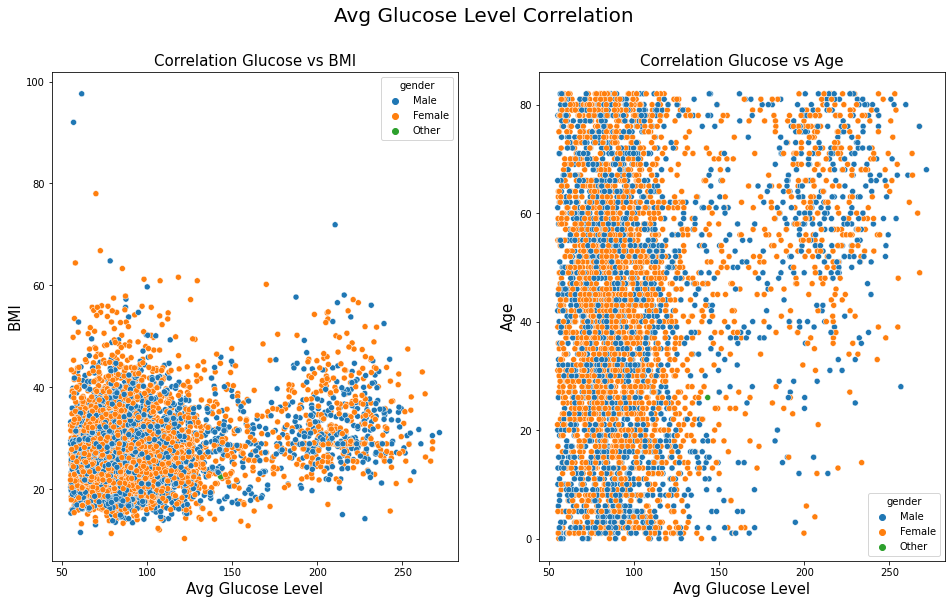

In [51]:

fig, axes = plt.subplots(1, 2, figsize=(16,9), sharey=False,sharex=False)
fig.suptitle('Avg Glucose Level Correlation',fontsize=20)

# Correlation between avg_glucose_level and bmi
sns.scatterplot(data=data_vis,x='avg_glucose_level',y='bmi',hue='gender',ax=axes[0])
axes[0].set_title('Correlation Glucose vs BMI',fontsize=15)
axes[0].set_ylabel('BMI',fontsize=15)
axes[0].set_xlabel('Avg Glucose Level',fontsize=15)

# correlation betewwn avg glucose level and age
sns.scatterplot(data=data_vis,x='avg_glucose_level',y='age',hue='gender',ax=axes[1])
axes[1].set_xlabel('Avg Glucose Level',fontsize=15)
axes[1].set_title('Correlation Glucose vs Age',fontsize=15)
axes[1].set_ylabel('Age',fontsize=15)

In [52]:
data_vis

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


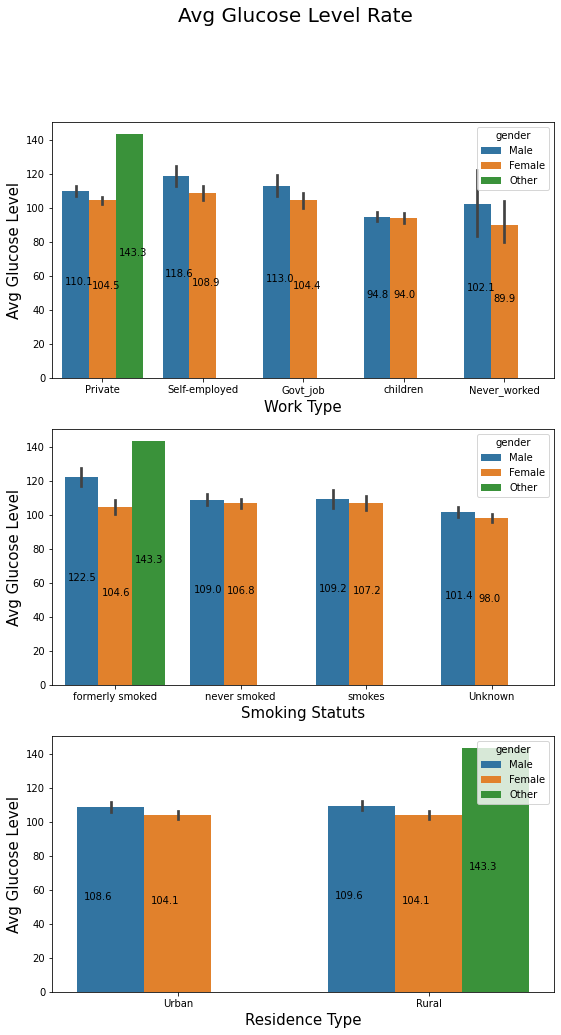

In [69]:
fig, axes = plt.subplots(3, 1, figsize=(9,16), sharey=True,sharex=False)
fig.suptitle('Avg Glucose Level Rate',fontsize=20)
# avg glucose level based on Work type and gender
sns.barplot( data=data_vis,y='avg_glucose_level',x='work_type',hue='gender',ax=axes[0])
axes[0].set_ylabel('Avg Glucose Level',fontsize=15)
axes[0].set_xlabel('Work Type',fontsize=15)
for  x in axes[0].patches:
   axes[0].text( x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.1f" % x.get_height())

# avg glucose level Based on Smoking Status and gender
sns.barplot(ax=axes[1], data=data_vis,y='avg_glucose_level',x='smoking_status',hue='gender')
axes[1].set_xlabel('Smoking Statuts',fontsize=15)
axes[1].set_ylabel('Avg Glucose Level',fontsize=15)
for  x in axes[1].patches:
   axes[1].text( x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.1f" % x.get_height())

#avg glucose level Based on Residence Type
sns.barplot(data=data_vis,y='avg_glucose_level',x='Residence_type',ax=axes[2],hue='gender')
axes[2].set_xlabel('Residence Type',fontsize=15)
axes[2].set_ylabel('Avg Glucose Level',fontsize=15)
for  x in axes[2].patches:
   axes[2].text( x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.1f" % x.get_height())



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


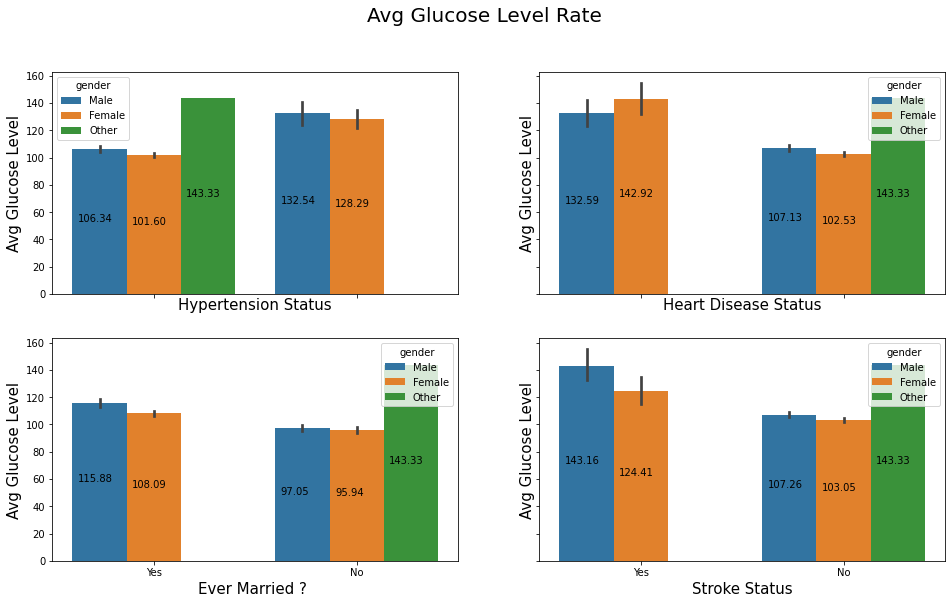

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(16,9), sharey=True,sharex=True)
fig.suptitle('Avg Glucose Level Rate',fontsize=20)
# avg glucose level based on hypertension status
sns.barplot( data=data_vis,y='avg_glucose_level',x='hypertension',hue='gender',ax=axes[0,0])
axes[0,0].set_ylabel('Avg Glucose Level',fontsize=15)
axes[0,0].set_xlabel('Hypertension Status',fontsize=15)
for  x in axes[0,0].patches:
   axes[0,0].text(x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.2f" % x.get_height())

# avg glucose level Based on heart disease status
sns.barplot(ax=axes[0,1], data=data_vis,y='avg_glucose_level', x='heart_disease',hue='gender')
axes[0,1].set_ylabel('Avg Glucose Level',fontsize=15)
axes[0,1].set_xlabel('Heart Disease Status',fontsize=15)
for  x in axes[0,1].patches:
   axes[0,1].text(x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.2f" % x.get_height())

#avg glucose level Based on Marriage Status
sns.barplot(data=data_vis,y='avg_glucose_level',x='ever_married',ax=axes[1,0],hue='gender')
axes[1,0].set_ylabel('Avg Glucose Level',fontsize=15)
axes[1,0].set_xlabel('Ever Married ? ',fontsize=15)
for  x in axes[1,0].patches:
   axes[1,0].text(x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.2f" % x.get_height())

#avg glucose level Based on Stroke Status
sns.barplot(data=data_vis,y='avg_glucose_level',x='stroke',ax=axes[1,1],hue='gender')
axes[1,1].set_ylabel('Avg Glucose Level',fontsize=15)
axes[1,1].set_xlabel('Stroke Status',fontsize=15)
for  x in axes[1,1].patches:
   axes[1,1].text(x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.2f" % x.get_height())